# Logistic regression for default prediction

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gaarutyunov/credit-risk/blob/master/notebooks/colab_log_reg.ipynb)

## Environment settings

For better performance change Colab runtime type to GPU

In [1]:
!git clone https://github.com/gaarutyunov/credit-risk.git

Cloning into 'credit-risk'...
remote: Enumerating objects: 412, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 412 (delta 39), reused 59 (delta 24), pack-reused 334
Receiving objects: 100% (412/412), 10.86 MiB | 26.22 MiB/s, done.
Resolving deltas: 100% (243/243), done.


In [2]:
%cd credit-risk

/content/credit-risk


In [3]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/sberbank-ai/wing.git (to revision master) to /tmp/pip-install-_m_7yaoq/wing_8384e47b5c5c45309be53e7483e37ff9
  Running command git clone -q https://github.com/sberbank-ai/wing.git /tmp/pip-install-_m_7yaoq/wing_8384e47b5c5c45309be53e7483e37ff9
     |████████████████████████████████| 151 kB 23.9 MB/s 
     |████████████████████████████████| 79 kB 9.1 MB/s 
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 117 kB 48.5 MB/s 
     |████████████████████████████████| 596 kB 47.3 MB/s 
  Created wheel for wing: filename=wing-0.1.6-py3-none-any.whl size=12768 sha256=46a41d09f0e882c348f3ba387d2e7329a727ebb89031b7df253dac43928cc530
  Stored in directory: /tmp/pip-ephem-wheel-cache-1d7xuv68/wheels/d0/d3/78/d1cb5717341968f8319fa57765f68a894fc1b21d4f4068b519
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_

To get username and key follow instructions in [readme](https://github.com/Kaggle/kaggle-api)

In [ ]:
%env KAGGLE_USERNAME=<username>
%env KAGGLE_KEY=<key>

In [12]:
!kaggle datasets download wordsforthewise/lending-club

 99% 1.25G/1.26G [00:07<00:00, 255MB/s]
100% 1.26G/1.26G [00:07<00:00, 186MB/s]


In [13]:
!unzip lending-club.zip

Archive:  lending-club.zip
  inflating: accepted_2007_to_2018Q4.csv.gz  
  inflating: accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv  
  inflating: rejected_2007_to_2018Q4.csv.gz  
  inflating: rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv  


In [14]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [15]:
!mv accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv data/accepted_2007_to_2018Q4.csv
!mv rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv data/rejected_2007_to_2018Q4.csv

## Preprocessing

In [18]:
from pipeline import get_pipeline

preprocessing = get_pipeline(
    name="log_reg",
    group='preprocessing',
    debug=True,
)

_target_: pipeline.LabelInferPipeline
memory: ./cache/preprocessing/log_reg
steps:
- - CSVReader
  - _target_: pipeline.CSVReader
    _convert_: all
    file: data/accepted_2007_to_2018Q4.csv
    columns:
    - term
    - emp_length
    - home_ownership
    - verification_status
    - purpose
    - zip_code
    - addr_state
    - earliest_cr_line
    - application_type
    - verification_status_joint
    - sec_app_earliest_cr_line
    - disbursement_method
    - loan_amnt
    - fico_range_low
    - fico_range_high
    - revol_bal
    - loan_status
    - emp_title
- - LabelTransformer
  - _target_: pipeline.LabelTransformer
    _convert_: all
- - ImputeNumerical
  - _target_: pipeline.ApplyToColumns
    _convert_: all
    inner:
      _target_: sklearn.impute.SimpleImputer
      strategy: mean
    columns:
    - loan_amnt
    - fico_range_low
    - fico_range_high
    - revol_bal
- - ImputeCategorical
  - _target_: pipeline.ApplyToColumns
    _convert_: all
    inner:
      _target_: sk

In [19]:
X = preprocessing.fit_transform([], y=[])
y = preprocessing.label_transformer.label

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:355: UserWarning: Persisting input arguments took 64.39s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name],
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:355: UserWarning: Persisting input arguments took 67.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name],


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, shuffle=True
)

## Training

To train with CPU remove overrides

In [21]:
from pipeline import get_pipeline

classifier = get_pipeline(
    name="log_reg",
    group='classifier',
    debug=True,
)

_target_: sklearn.pipeline.Pipeline
memory: ./cache/classifier/log_reg
steps:
- - Classifier
  - _target_: sklearn.linear_model.LogisticRegression
    _convert_: all
    class_weight: balanced



In [22]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(memory='./cache/classifier/log_reg',
         steps=[['Classifier', LogisticRegression(class_weight='balanced')]])

In [33]:
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6310025557855837

In [25]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.6273028690663596

In [26]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred)

0.26082869092156696

In [34]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.40260274321565426

In [27]:
y_pred = classifier.predict_proba(X_test)[:, 1]

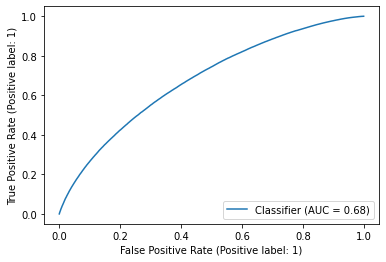

In [28]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)

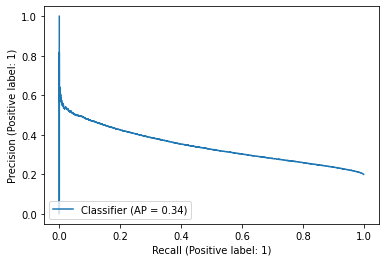

In [29]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_test, y_pred)

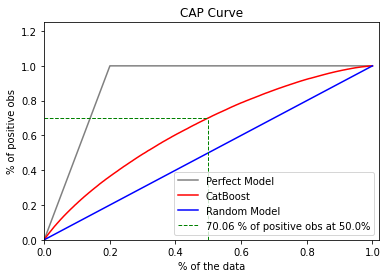

In [30]:
from utils import capcurve

capcurve(y_test, y_pred)

In [31]:
from joblib import dump

dump(classifier, 'models/log_reg.joblib')

['models/log_reg.joblib']